<a href="https://colab.research.google.com/github/bishakha1995/Eda-Airbnb/blob/main/Final_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>


#####**Description of the features of Airbnb dataset**
Now our Airbnb dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.
Below are the features and their description:
*   id and name - They are simply the listing id and their names
*   host_id and host_name - They signify the id of host who are associated to the respective listing and their names
*   neighbourhood_group - It contains the district of the listing.
*   neighbourhood - the neighbourhood of the respective neibourhood groups.
*   latitude and longitude - the geogarphical co-ordinates of respective listings.
* room_types - listing space type
*   price - price of listing in dollars
*   minimum_nights - amount of nights minimum
*   calculated_host_listings_count - amount of listing per host
* availability_365 - number of days when listing is available for booking
* number_of_reviews - Total number of reviews
* reviews_per_month - average of reviews per month
* last_review - date of the last review recorded

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)            #setting the default figure size for all plots
sns.set_style('darkgrid')

In [ ]:
#loading Airbnb csv file
main_df = pd.read_csv('/content/drive/MyDrive/CapstoneProject1/Airbnb NYC 2019.csv', parse_dates=['last_review'])

In [ ]:
#copying the main_df to airbnb_df
airbnb_df = main_df.copy()

In [ ]:
#inspecting the airbnb_df
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#find the shape of dataset
airbnb_df.shape

(48895, 16)

In [ ]:
airbnb_df.info() #determining the data types of the features and also taking a look over the null values if there is any

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [ ]:
#dropping the features that we don't need in our analysis
airbnb_df.drop(['id', 'last_review'], axis=1, inplace=True)

In [ ]:
airbnb_df.shape

(48895, 14)

In [ ]:
#Finding the total number of null values present in each feature
airbnb_df.isnull().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b50bc7ad0>]],
      dtype=object)

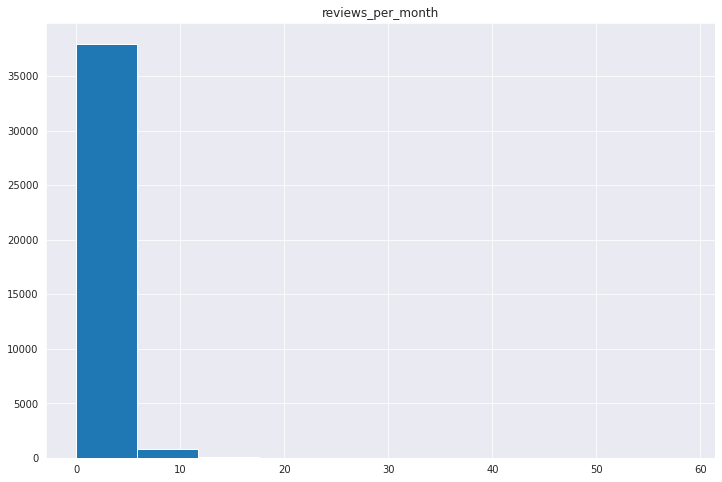

In [ ]:
#Since 'reviews_per_month' column has a lot of missing values so we have to fill all the missing values at that column
#First we are checking the distribution of data in the respective column to get the idea of the most appropriate value (mean, mode, median) to relace null values
airbnb_df.hist(['reviews_per_month'])

In [ ]:
#As we can see from the above histogram that the data is not normally distributed so we will fill all null values with the median of reviews_per_month column
airbnb_df['reviews_per_month'].fillna(airbnb_df['reviews_per_month'].median(), inplace=True)

In [ ]:
#we are dropping the null values from name and host_name because they are comparitively very less in number than the entire data set
airbnb_df = airbnb_df.dropna(subset = ['name','host_name'])

In [ ]:
#check the null values again to be ensure that all the null values are eliminated or filled with appropriate value
airbnb_df.isnull().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
#now to get the holistic info of the numerical features of our dataset we will use describe method
airbnb_df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,1.239035,7.148369,112.801425
std,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,1.520889,32.964600,131.610962
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


we can see from the output of the describe method that there are some outliers in our dataset

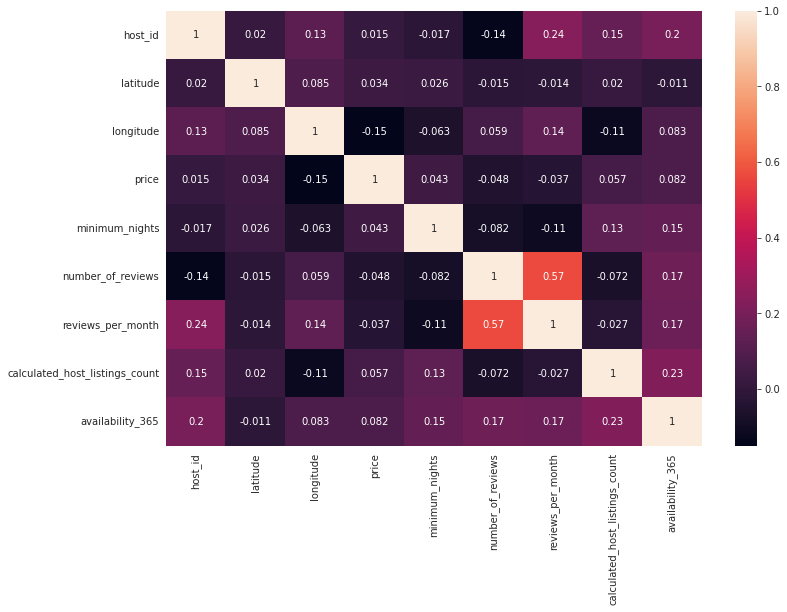

In [ ]:
#verifying the correlation of different features in the airbnb_df 
sns.heatmap(airbnb_df.corr(), annot=True)

#Observations from correlation plot

1. There is  a negative correlation between host_id and number_of reviews so we can say for a region where there are more number of hosts, the guests will have have more option of booking that are available which will ultimately divides the number of reviews or, if the particular host have multiple Airbnb listings then he will have a lot to manage already, so he does not take proper reviews from their guests.
2. There is a negative correlation between longitude and price and mild positive correlation between latitude and price, so we can say that the areas towards north-west are more costly
3. There is a negative correlation between longitude and calculated_host_listings_count, depicts that areas towards west have more Airbnb listings.
4. price and number_of_reviews are negatively correlated to each other as lesser number of people will prefer the costly aboard
5. number_of_reviews and reviews_per_month have negative correlation with minimum_nights, we can conclude that guest prefers flexibility of check-out.

In [ ]:
#listing all the columns present in dataset
airbnb_df.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:

#categorical columns are 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type'
cat_col = ['neighbourhood_group', 'neighbourhood', 'room_type'] #list of selected categorical features that has lesser number of categories.
for col in airbnb_df[cat_col]:             #determining and printing the unique values of categorical columns using loop
  x = airbnb_df[col].unique().tolist()
  if len(x)<=5:
    print(f"Unique values present in the '{col}':  {x}") #printing unique values of the feature
  else:
    print(f"Total number of unique values present in '{col}': {len(x)}") #printing total number of unique values that are present



Unique values present in the 'neighbourhood_group':  ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
Total number of unique values present in 'neighbourhood': 221
Unique values present in the 'room_type':  ['Private room', 'Entire home/apt', 'Shared room']


In [ ]:
airbnb_df['neighbourhood_group'].value_counts() #determining the total count of Airbnb listings for each 'neighbourhood_group'

Manhattan        21643
Brooklyn         20089
Queens            5664
Bronx             1089
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
airbnb_df['neighbourhood'].value_counts()  #determining number of listings present in each 'neighbourhood'

Williamsburg          3917
Bedford-Stuyvesant    3713
Harlem                2655
Bushwick              2462
Upper West Side       1969
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [ ]:
airbnb_df['room_type'].value_counts() #To determine what are the room types that are available in our dataset

Entire home/apt    25393
Private room       22306
Shared room         1159
Name: room_type, dtype: int64

#**What can we learn about different hosts and areas?**

In [ ]:
airbnb_df.columns  #determining the different columns that are present in our dataset

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
#who is the top_host on the basis of max number of listings.
top_host = airbnb_df[['host_id','host_name','neighbourhood_group']].groupby(['host_id', 'host_name','neighbourhood_group']).size().sort_values(ascending=False).reset_index().rename(columns={0:'listing_count'})

In [ ]:
top_host.head(10) #showing the top 10 host with their Ids and neighbourhood group

,host_id,host_name,neighbourhood_group,listing_count
0,219517861,Sonder (NYC),Manhattan,327
1,107434423,Blueground,Manhattan,230
2,30283594,Kara,Manhattan,121
3,16098958,Jeremy & Laura,Manhattan,96
4,12243051,Sonder,Manhattan,96
5,61391963,Corporate Housing,Manhattan,91
6,22541573,Ken,Manhattan,86
7,137358866,Kazuya,Queens,79
8,200380610,Pranjal,Manhattan,65
9,1475015,Mike,Manhattan,52


As we can see that the people from Manhattan has most number of Airbnb listings, so we can say that Airbnb is more popular in the Manhattan compared to other neighbourhood groups. Also there is a possiblity that more number of people visits Manhattan among all the 5 boroughs.

Text(0, 0.5, 'Number of Airbnb Listings')

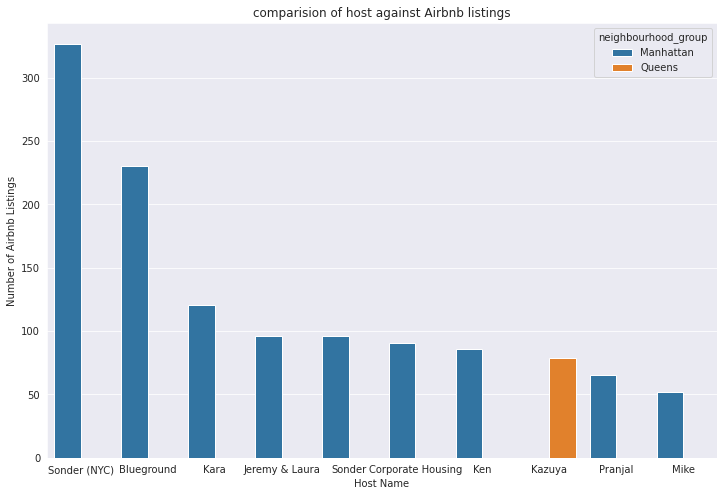

In [ ]:
#visualizing the top 10 host for a clear comparision               #setting the length and width of the graph
sns.barplot(x='host_name', y='listing_count', hue='neighbourhood_group', data=top_host.head(10)) #plotting a bar chart to show the comparision between host and the number of Airbnb listings associated to them
plt.title("comparision of host against Airbnb listings")             #setting the title of bar chart
plt.xlabel("Host Name")                                              #setting the x label to host name
plt.ylabel("Number of Airbnb Listings")                              #setting the y label to number of listings

Text(0, 0.5, 'Total Airbnb Listings')

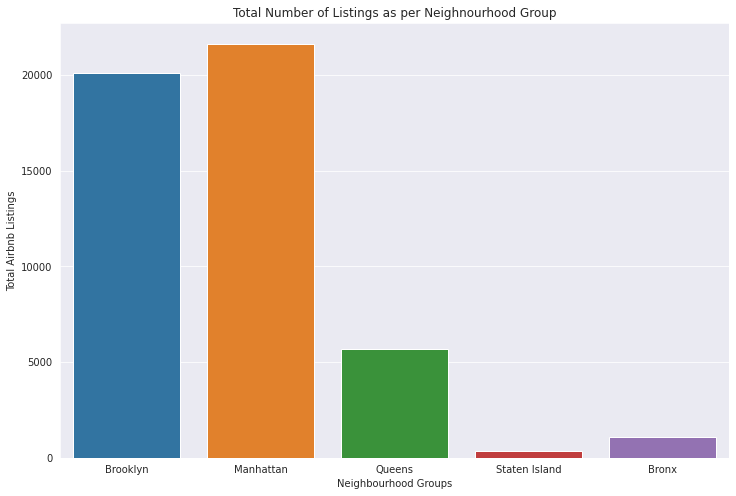

In [ ]:
#Plotting a bar chart to show total number of listings present in each neighbourhood group
sns.countplot(x='neighbourhood_group', data=airbnb_df)
plt.title("Total Number of Listings as per Neighnourhood Group")
plt.xlabel("Neighbourhood Groups")
plt.ylabel("Total Airbnb Listings")

We can conclude from the above bar chart that 'Brooklyn' and 'Manhattan' has most number of Airbn listings. And 'Staten Island' has the least number of Airbnb Listings

In [ ]:
#since 'Manhattan' and 'Brooklyn' has the most number of Airbnb listings, so based on this we will find top 10 neighbourhood which has most number of airbnb listings
top_neighbourhood = airbnb_df[airbnb_df['neighbourhood_group'].isin(['Manhattan', 'Brooklyn'])]['neighbourhood'].value_counts()

In [ ]:
top_neighbourhood = top_neighbourhood.head(10) #Determining the top 10 neighbourhoods of Manhattan and Brooklyn

In [ ]:
top_neighbourhood 

Williamsburg          3917
Bedford-Stuyvesant    3713
Harlem                2655
Bushwick              2462
Upper West Side       1969
Hell's Kitchen        1954
East Village          1852
Upper East Side       1797
Crown Heights         1563
Midtown               1545
Name: neighbourhood, dtype: int64

In [ ]:
top_neighbourhood.index     #extracting the index

Index(['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick',
       'Upper West Side', 'Hell's Kitchen', 'East Village', 'Upper East Side',
       'Crown Heights', 'Midtown'],
      dtype='object')

In [ ]:
top_neighbourhood.head(10).values    #extracting the values present at the index of top_neighbourhood series

array([3917, 3713, 2655, 2462, 1969, 1954, 1852, 1797, 1563, 1545])

Text(0.5, 0, 'Total Airbnb Listings')

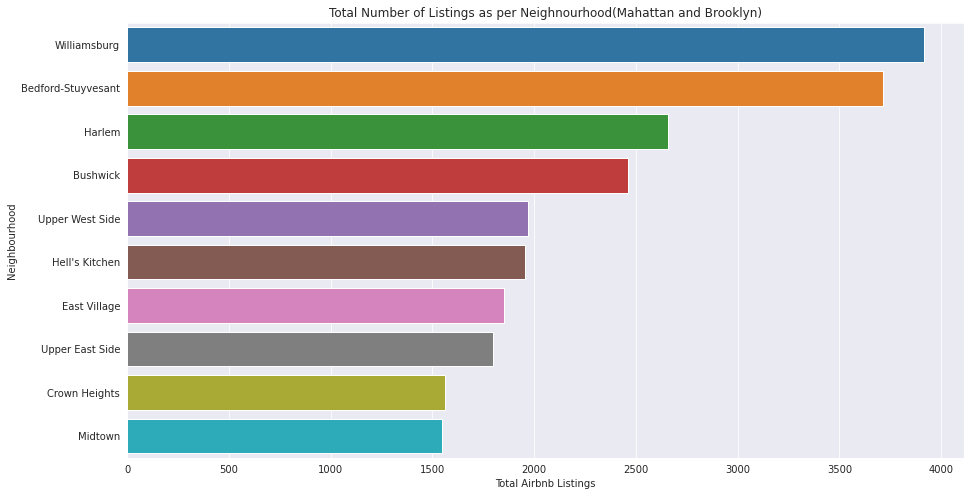

In [ ]:
#visualizing the top 10 neighbourhood
plt.figure(figsize=(15,8))
sns.barplot(y=top_neighbourhood.index, x=top_neighbourhood.values)
plt.title("Total Number of Listings as per Neighnourhood(Mahattan and Brooklyn)")
plt.ylabel("Neighbourhood")
plt.xlabel("Total Airbnb Listings")

###Determing different room types that are available in neighbourhood groups, more preferred rooms as per minimum nights

Text(0.5, 0, 'Neighbourhood Groups')

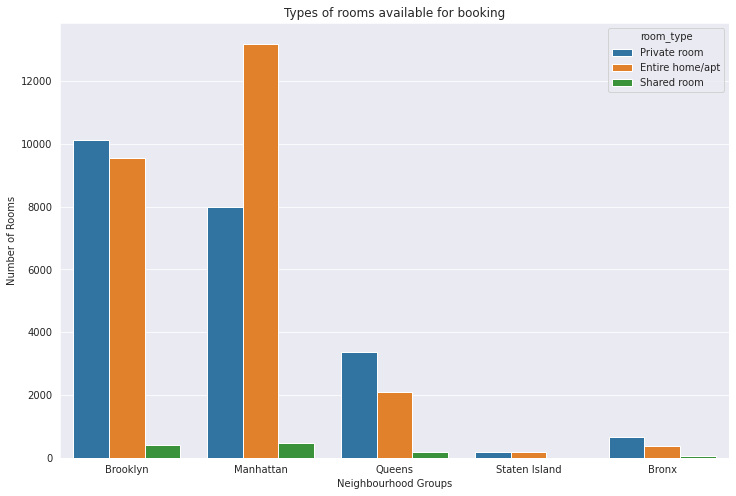

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='neighbourhood_group',hue='room_type', data=airbnb_df) #plotting the barchart to show the different types of rooms avilable for booking in the neighbourhood groups
plt.title("Types of rooms available for booking")
plt.ylabel("Number of Rooms")
plt.xlabel("Neighbourhood Groups")

we can see that number of shared rooms are very less in comparision to other room types, hence we can coclude that most people do not prefer shared rooms.

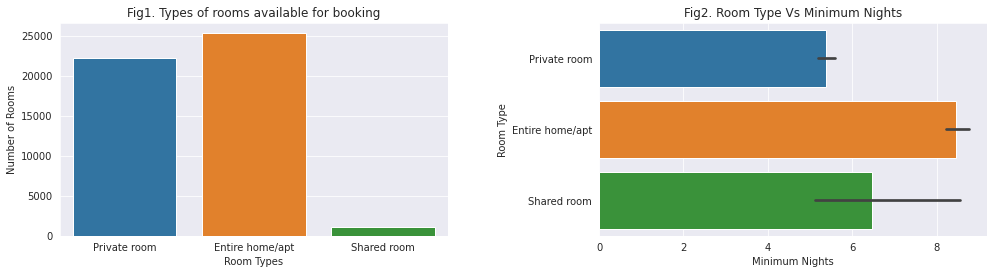

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(x='room_type', data=airbnb_df)  #plotting a graph to show the total number of room types available in our Airbnb dataset
plt.title("Fig1. Types of rooms available for booking")
plt.xlabel("Room Types")
plt.ylabel("Number of Rooms")

plt.subplot(1, 2, 2)
sns.barplot(x='minimum_nights', y='room_type', data=airbnb_df)    #plotting a graph to show the room type preference as per the minimum nights
plt.title("Fig2. Room Type Vs Minimum Nights")
plt.xlabel("Minimum Nights")
plt.ylabel("Room Type")

plt.tight_layout(5)


Observations

*   Fig1. depicts that Entire home/apt are maximum in number and Shared room is least in number.
*   Fig2. depicts that guests prefer renting an Entire home/apt and shared room for long stay, private rooms are preferred generally for short stay.



#What can we learn from predictions? (ex: locations, prices, reviews, etc)

Text(0, 0.5, 'Price')

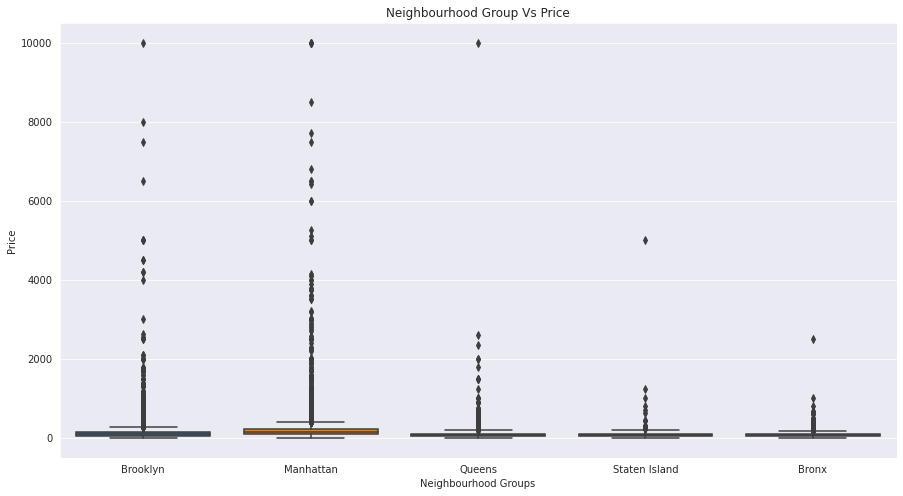

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='neighbourhood_group', y='price', data=airbnb_df) #plotting a box plot between price and neighbourhood group.
plt.title("Neighbourhood Group Vs Price")
plt.xlabel("Neighbourhood Groups")
plt.ylabel("Price")

As we can see from above boxplot that there are some outliers, and the graph is not clearly interpretable so we will eliminate the outliers to get a visible interpretation of graph and also to bring a uniformity in our dataset.

In [ ]:
airbnb_df['price'].describe()

count    48858.000000
mean       152.740309
std        240.232386
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

As we can see from above that almost 75 percentile of data lies under 175, so we can assume that most of data the is under 500. So we will filter out the data to get rid of the outliers in the price.

In [ ]:
final_df = airbnb_df[airbnb_df['price']<=500]   #filtering the data to get rid of the records for which has price is greater than 500

In [ ]:
final_df.shape   #checking the shape of the filtered data frame to examine if there is any higher amount of data loss that can affect our results.

(47814, 14)

In [ ]:
airbnb_df.shape

(48858, 14)

Text(0, 0.5, 'Price')

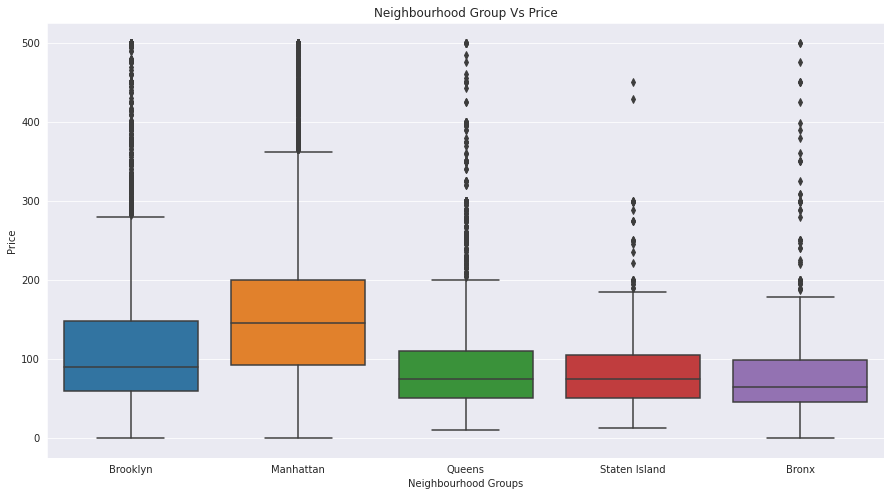

In [ ]:
#again plotting the graph to visualize which neighbouhood group is costly and which is cheaper after removing the outliers in price coloumn
plt.figure(figsize=(15,8))
sns.boxplot(x='neighbourhood_group', y='price', data=final_df)
plt.title("Neighbourhood Group Vs Price")
plt.xlabel("Neighbourhood Groups")
plt.ylabel("Price")



*   From above we can conclude that Manhattan is the costliest neighbourhood group followed by Brooklyn and Bronx is the cheapest one.
*  Bookings in State Island and Queens have almost same cost.



Text(0, 0.5, 'Average Monthly Reviews')

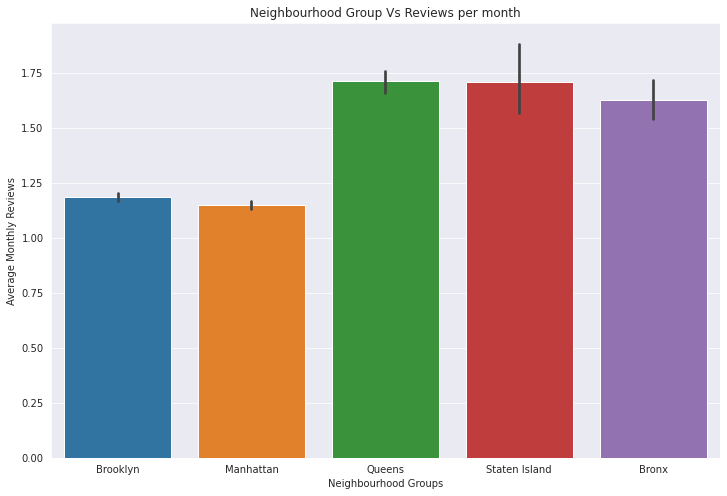

In [ ]:

sns.barplot(x='neighbourhood_group', y='reviews_per_month', data=final_df)      #Plotting bar chart to show neighbourhood group has max average of reviews per month.
plt.title("Neighbourhood Group Vs Reviews per month")
plt.xlabel("Neighbourhood Groups")
plt.ylabel("Average Monthly Reviews")

Above bar chart clearly depicts that Queens, Bronx and Staten Island have got more max average reviews.

In [ ]:
final_df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.72,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


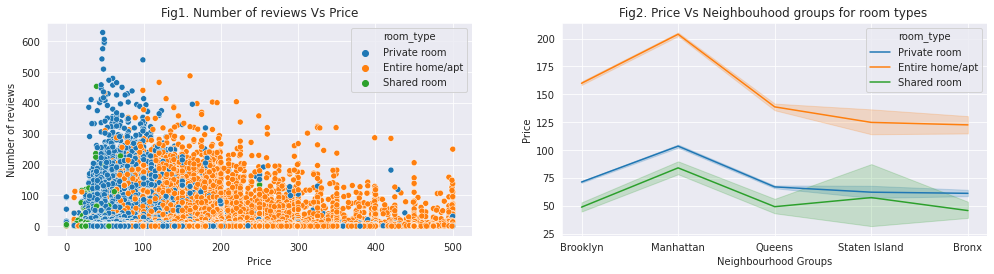

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)  # row 1, column 2, count 1
sns.scatterplot(x='price', y='number_of_reviews', hue='room_type', data=final_df)    #scatterplot to show the relation between number of reviews and price for all the three room types
plt.title("Fig1. Number of reviews Vs Price")
plt.xlabel("Price")
plt.ylabel("Number of reviews")

plt.subplot(1, 2, 2)
sns.lineplot(x='neighbourhood_group', y='price',hue='room_type', data=final_df)      #line graph to show the price Vs neighbourhood groups for all 3 room types
plt.title("Fig2. Price Vs Neighbouhood groups for room types ")
plt.xlabel("Neighbourhood Groups")
plt.ylabel("Price")

plt.tight_layout(5)

Text(0, 0.5, 'Number of reviews')

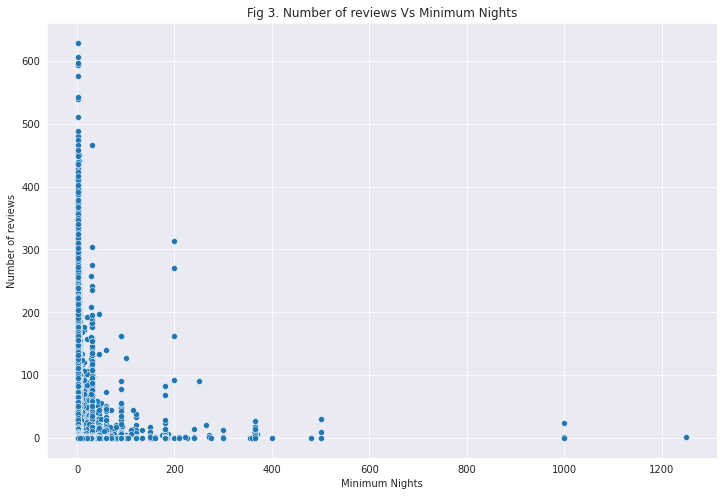

In [ ]:
sns.scatterplot(x='minimum_nights', y='number_of_reviews', data=final_df)   #showing the relation between number_of_reviews and minimum_nights attributes of Airbnb
plt.title("Fig 3. Number of reviews Vs Minimum Nights")
plt.xlabel("Minimum Nights")
plt.ylabel("Number of reviews")

Observation: From Fig 1, 2 and 3 we can clearly see the relation between number of reviews, minimum nights and price for the room types that are available for bookings. As Entire home/apt are generally preferred by a guest who would have booked a listing for long stay and are more costly than Private rooms and shared rooms. That's why most of the guest would go for other room types options. Also the guest prefers the type of listing where there the lesser minimum nights.

#Which hosts are the busiest and why?

In [ ]:
final_df.columns      #listing the columns in final_df

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

Occupancy rate - It is percentage of days a listing is occupied in year(i.e. if all the available days are rented out, then the listing’s occupancy rate is 100%).
Formula for estimating Occupancy rate is as follows: occupancy = ((reviews per month * min. nights) * 12) / availability_365

In [ ]:
final_df['occupancy'] = (final_df['reviews_per_month']* final_df['minimum_nights'] * 12) / final_df['availability_365']    #Creating a new feature occupancy which will contain the occupancy rate of a listing


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:

final_df.head()   #Verifying a 'occupancy'feature is added to final_df

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,occupancy
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,0.006904
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,0.012845
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.72,1,365,0.071014
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,0.287010
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,inf


In [ ]:
final_df['occupancy'].describe()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    4.781400e+04
mean              inf
std               NaN
min      3.287671e-04
25%      2.357331e-01
50%      1.368000e+00
75%               NaN
max               inf
Name: occupancy, dtype: float64

In [ ]:
 final_df.replace([np.inf, -np.inf], 0, inplace=True)   #replacing all the infinite values by 0.

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
busy_host = final_df.groupby(['host_id', 'host_name'])['occupancy'].mean().sort_values(ascending=False).reset_index().rename(columns={'occupancy': 'Avg_occupacy'}) #craeting a data frame with host_id, host name and average occupancy

In [ ]:
busy_host.head()    #verifying the dataset is created

,host_id,host_name,Avg_occupacy
0,58389790,Claudia & Turi,1555.20
1,216891728,Sonia,756.48
2,49572092,Laura,540.00
3,10440694,Gia,440.40
4,25371059,Emma,435.60


In [ ]:
busy_host.columns

Index(['host_id', 'host_name', 'Avg_occupacy'], dtype='object')

In [ ]:

top_busy_host = busy_host['host_name'].iloc[:5].tolist()
print(top_busy_host)

['Claudia & Turi', 'Sonia', 'Laura', 'Gia', 'Emma']


On the basis of average occupancy we can see that 'Claudia & Turi' has max average occupancy, which means their listings are mostly occupied over a year, hence they are the busiest host.

#Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [ ]:
nbh_label = final_df['neighbourhood_group'].value_counts().index.tolist()    #assigning the list of index to the variable nbh_label
nbh_values = final_df['neighbourhood_group'].value_counts().values           #assigning the list of values to the variable nbh_values

In [ ]:
print(nbh_label)
print(nbh_values)

['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']
[20870 19860  5635  1082   367]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Percentage distribution of Listings in 5 neighbouhood groups')

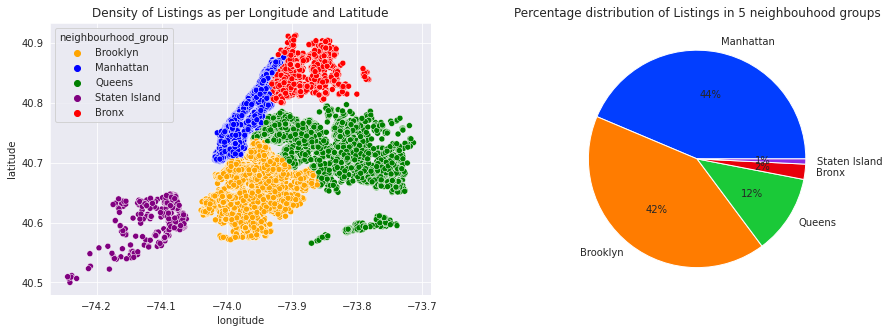

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
color_dict = dict({'Manhattan':'blue',
                  'Brooklyn':'orange',
                  'Staten Island': 'purple',
                  'Bronx': 'red',
                   'Queens': 'green'})
sns.scatterplot('longitude', 'latitude', hue='neighbourhood_group',palette = color_dict, data=final_df);   #scatterplot between longitude and latitude to the density of listings in neighbourhood groups
plt.title("Density of Listings as per Longitude and Latitude")

plt.subplot(1, 2, 2)
palette_color = sns.color_palette('bright')
plt.pie(nbh_values, labels=nbh_label, colors=palette_color, autopct='%.0f%%');          #Pie chart to show the percentage distribution of listings in neighbourhood groups
plt.title("Percentage distribution of Listings in 5 neighbouhood groups")

From above two charts it can be concluded that Manhattan and Brooklyn have more traffic. Manhattan has more traffic probably because it is the most popular borough of NYC and cosidered to have most of very popular attractions. Infact most people believe Manhattan to be the synonym of NYC. Brooklyn comes second on the basis of traffic as it is considered to be the second most famous district of New York after Manhattan.

#**Conclusion**:
We have explored the Airbnb dataset and drawn a lot of information out of it. This Airbnb dataset contains data from five boroughs of New York City namely Mahattan, Brooklyn, Queens, Bronx and Staten Island. Some of the conclusions that are listed below: 
1.   **Manhattan has the maximum number of Airbnb listing and is the costliest among all the five boroughs, some of the factors contributing to it are as follows:**
> *   Manhattan's geographical location: Manhattan is located as such that most of the districts are not at much distance to it.
>*   Almost 99% of the attractions are in Manhattan namely Empire State Building, the Rockefeller Center, the surprising Chrysler Building, the fascinating Times Square, the controversial MoMA, and other top attractions.  
>*   Manhattan is home to the world's two largest stock exchanges by total market capitalization: the New York Stock Exchange and Nasdaq and the borough hosts the United Nations headquarters
>*   The borough has been the setting for numerous books, films, and television shows.

2.  **The top host that has maximum number of listing is Sonder (NYC) who is from Manhattan.**

3. **The room types of Airbnb listings have three categories - Private Room, Entire Home/apt and Shared Room. Follwing are the observations that we got from our data exploration:**
>* Entire Home/Apt are costliest and maximum in number, and it is generally booked for long duration and maximum number of this room type is available in Manhattan.
>* People prefer Private room for short duration and it is less costly than Entire home/apt and Shared room types are the cheapest and very less preferred.
>* Private rooms have greater number of reviews than other two room types as it cost less than Entire home/apt and the listings offering private rooms  has lesser minimum nights dependency which gives guests the flexibility to check out.

4. **The boroughs that has less number of listings namely Queens, Staten Island and Bronx, are receiving more number of reviews. Manhattan and Brooklyn has lesser number of reviews comparitively. This may be due to following reasons:**
>* The number of listings in Queens, Staten island and Bronx are less and the hosts are able to cater to most of their guests.
>* There may be more corporate bookings in Manhattan or the high profile people are visiting Manhattan, and they probably do not give reviews most often.







